In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import numpy as np
from os.path import expanduser
%config InlineBackend.figure_format = 'svg'

sns.set() # sets seaborn default "prettyness:
sns.set_style("ticks")
# sns.set_context("paper")
# import matplotlib as mpl
# scale = 0.8
# d = dict([(k, v*scale) for (k, v) in sns.plotting_context('paper').items()])
# d['figure.figsize'] = [5.4, 3.5]
# mpl.rcParams.update(d)


def abline(slope, intercept, ax=None):
    "Add a straight line through the plot"
    if ax is None:
        ax = plt.gca()
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, '--', color='grey')
    
def add_band(x_low, x_high, y_low=None, y_high=None, ax=None, color='gray', linewidth=0, alpha=0.5, zorder=0, **kwargs):
    "Plot a gray block on x interval"
    if ax is None:
        ax = plt.gca()
    if y_low is None:
        y_low, _ = ax.get_ylim()
    if y_high is None:
        _, y_high = ax.get_ylim()
    g = ax.add_patch(Rectangle((x_low, y_low), x_high-x_low, y_high-y_low, 
                 facecolor=color,
                 linewidth=linewidth,
                 alpha=alpha,
                 zorder=zorder,
                 **kwargs))

def stairs(df, start='start', end='end', pos='pos', endtrim=0):
    "Turn a df with start, end into one with pos to plot as stairs"
    df1 = df.copy(deep=True)
    df2 = df.copy(deep=True)
    df1[pos] = df1[start]
    df2[pos] = df2[end] - endtrim
    return pd.concat([df1, df2]).sort_values([start, end])

In [38]:
meta_data_samples = pd.read_csv(expanduser("~/baboondiversity/people/kmt/baboons/data/Papio_metadata_with_clustering.txt"), sep =" ")
meta_data_samples.Origin.unique()

array(['Mikumi, Tanzania', 'Aberdare, Kenya', 'Chunga, Zambia', 'captive',
       'Awash, Ethiopia', 'Serengeti, Tanzania', 'Arusha, Tanzania',
       'Ngorongoro, Tanzania', 'Ruaha, Tanzania', 'Gombe, Tanzania',
       'Udzungwa, Tanzania', 'Mahale, Tanzania', 'Katavi, Tanzania',
       'Selous, Tanzania', 'Lake Manyara, Tanzania',
       'Tarangire, Tanzania', 'Niokolo-Koba, Senegal',
       'Issa Valley, Tanzania', 'Dendro Park, Zambia', 'Filoha, Ethiopia',
       'Gog Woreda, Gambella region, Ethiopia'], dtype=object)

In [62]:
gog_olives = meta_data_samples.loc[meta_data_samples.Origin == "Gog Woreda, Gambella region, Ethiopia", :].PGDP_ID
chunga_kinda = meta_data_samples.loc[meta_data_samples.Origin == "Chunga, Zambia", :].PGDP_ID
mahale_yellow = meta_data_samples.loc[meta_data_samples.Origin == "Mahale, Tanzania", :].PGDP_ID
mikumi_yellow = meta_data_samples.loc[meta_data_samples.Origin == "Mikumi, Tanzania", :].PGDP_ID
#mean_window_df_eth = window_df_tanz.loc[window_df_tanz.individual.isin(gog_olives)].groupby(["chrom", "individual", "start", "end"]).mean().reset_index()

In [3]:
rfmix_path = expanduser("~/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_gen100/tanzania_focus/")
df_l = []
chroms = ["chr{}".format(x) for x in (range(1, 21))]+["all_chrX"]
for c in chroms:
    read_file = rfmix_path + "{}.windows.txt".format(c)
    df = pd.read_csv(read_file, sep="\t")
    df_l.append(df)
window_df_tanz = pd.concat(df_l)
mean_window_df_tanz = window_df_tanz.groupby(["chrom", "individual", "start", "end"]).mean().reset_index()
mean_window_df_tanz.to_hdf("../results/mean_window_df_tanz.h5", key='df', format='table')
mean_window_df_tanz.head()


KeyboardInterrupt



In [ ]:
rfmix_path = expanduser("/home/kmt/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_gen100/eth_olive_focus/")
df_l = []
chroms = ["chr{}".format(x) for x in (range(1, 21))]+["all_chrX"]
for c in chroms:
    read_file = rfmix_path + "{}.windows.txt".format(c)
    df = pd.read_csv(read_file, sep="\t")
    df_l.append(df)
window_df_tanz = pd.concat(df_l)
mean_window_df_eth = window_df_tanz.groupby(["chrom", "individual", "start", "end"]).mean().reset_index()
mean_window_df_eth.to_hdf("../results/mean_window_df_eth.h5", key='df', format='table')
mean_window_df_eth.head()

In [27]:
mean_window_df_tanz = pd.read_hdf('~/baboondiversity/people/kmt/baboons/results/mean_window_df_tanz.h5')
mean_window_df_eth = pd.read_hdf('~/baboondiversity/people/kmt/baboons/results/mean_window_df_eth.h5')

In [36]:
window_means_gog = mean_window_df_eth.loc[mean_window_df_eth.individual.isin(gog_olives), :].groupby(['chrom', 'start', 'end']).north_sum.mean().to_frame().reset_index()
chrX_window_means_gog = window_means_gog.loc[window_means_gog.chrom == 'all_chrX', :].copy()

In [37]:
window_means_chunga = mean_window_df_eth.loc[mean_window_df_eth.individual.isin(chunga_kinda), :].groupby(['chrom', 'start', 'end']).north_sum.mean().to_frame().reset_index()
chrX_window_means_chunga = window_means_chunga.loc[window_means_chunga.chrom == 'all_chrX', :].copy()

In [37]:
window_means_chunga = mean_window_df_eth.loc[mean_window_df_eth.individual.isin(chunga_kinda), :].groupby(['chrom', 'start', 'end']).north_sum.mean().to_frame().reset_index()
chrX_window_means_chunga = window_means_chunga.loc[window_means_chunga.chrom == 'all_chrX', :].copy()

In [41]:
window_means_mahale = mean_window_df_eth.loc[mean_window_df_eth.individual.isin(mahale_yellow), :].groupby(['chrom', 'start', 'end']).north_sum.mean().to_frame().reset_index()
chrX_window_means_mahale = window_means_mahale.loc[window_means_mahale.chrom == 'all_chrX', :].copy()

In [63]:
window_means_mikumi = mean_window_df_tanz.loc[mean_window_df_tanz.individual.isin(mikumi_yellow), :].groupby(['chrom', 'start', 'end']).north_sum.mean().to_frame().reset_index()
chrX_window_means_mikumi = window_means_mikumi.loc[window_means_mikumi.chrom == 'all_chrX', :].copy()

In [32]:
# def get_runs(df, fun):
#     df = df.copy()
#     df.loc[:, 'label'] = fun(df)
#     df.loc[:, 'run'] = (df.label != df.label.shift()).cumsum()
#     df = (df
#            .loc[df.label]
#            .groupby('run')
#            .apply(lambda df: pd.DataFrame(dict(start=[df.start.min()], end=[df.end.max()])))
#            )
#     df['length'] = df.end - df.start
#     return df

# cut = 95000

# high_hama = get_runs(chrX_window_means_gog, fun=lambda df: df.north_sum >= cut)
# high_olive = get_runs(chrX_window_means_gog, fun=lambda df: df.north_sum == 0)

# plot_df = stairs(chrX_window_means_gog)
# plt.figure(figsize=(15, 3))
# plt.fill_between(plot_df.pos, plot_df.north_sum/100_000, ec='none')
# plt.axhline(1, linestyle='dashed', color='black', linewidth=0.5)
# plt.axhline(cut/100000, linestyle='dashed', color='black', linewidth=0.5)
# plt.ylim(0, 1.2)
# plt.xlim(left=0)
# [add_band(tup.start, tup.end, 1.05, 1.1, color='red', alpha=1) for tup in high_hama[['start', 'end']].itertuples()] ;
# [add_band(tup.start, tup.end, 1.1, 1.15, color='green', alpha=1) for tup in high_olive[['start', 'end']].itertuples()] ;
# sns.despine()
# plt.savefig("tmp.svg")

In [42]:
# def get_runs(df, fun):
#     df = df.copy()
#     df.loc[:, 'label'] = fun(df)
#     df.loc[:, 'run'] = (df.label != df.label.shift()).cumsum()
#     df = (df
#            .loc[df.label]
#            .groupby('run')
#            .apply(lambda df: pd.DataFrame(dict(start=[df.start.min()], end=[df.end.max()])))
#            )
#     df['length'] = df.end - df.start
#     return df

# region_cut = 95000
# high_hama = get_runs(chrX_window_means_gog, fun=lambda df: df.north_sum >= region_cut)
# high_olive = get_runs(chrX_window_means_gog, fun=lambda df: df.north_sum == 0)

# df = chrX_window_means_gog.copy()
# df['edge'] = np.nan
# cut = 90000
# jump = 10000
# df.loc[(df.north_sum > cut) & (df.north_sum - df.north_sum.shift() > jump), 'edge'] = df.loc[(df.north_sum > cut) & (df.north_sum - df.north_sum.shift() > jump), 'end']
# df.loc[(df.north_sum.shift() > cut) & (df.north_sum - df.north_sum.shift() < -jump), 'edge'] = df.loc[(df.north_sum.shift() > cut) & (df.north_sum - df.north_sum.shift() < -jump), 'start']
# edges = df.loc[~df.edge.isnull(), 'edge']

# plot_df = stairs(chrX_window_means_gog)
# plt.figure(figsize=(15, 3))
# plt.fill_between(plot_df.pos, plot_df.north_sum/100_000, ec='none')
# plt.axhline(1, linestyle='dashed', color='black', linewidth=0.5)
# plt.axhline(cut/100000, linestyle='dashed', color='black', linewidth=0.5)
# plt.ylim(0, 1.2)
# [add_band(tup.start, tup.end, 1.05, 1.1, color='red', alpha=1) for tup in high_hama[['start', 'end']].itertuples()] ;
# [add_band(tup.start, tup.end, 1.1, 1.15, color='green', alpha=1) for tup in high_olive[['start', 'end']].itertuples()] ;
# plt.vlines(edges, ymin=0, ymax=1.2, color='red', linewidth=0.1) ;
# sns.despine()
# plt.savefig("tmp.svg")

In [96]:
def get_runs(df, fun):
    df = df.copy()
    df.loc[:, 'label'] = fun(df)
    df.loc[:, 'run'] = (df.label != df.label.shift()).cumsum()
    df = (df
           .loc[df.label]
           .groupby('run')
           .apply(lambda df: pd.DataFrame(dict(start=[df.start.min()], end=[df.end.max()])))
           )
    df['length'] = df.end - df.start
    return df

def plot(means_df, ax=None, alpha=1):
    if ax is None:
        ax = plt.gca()
    region_cut = 95000
    high_map = get_runs(means_df, fun=lambda df: df.north_sum >= region_cut)
    no_map = get_runs(means_df, fun=lambda df: df.north_sum == 0)
    
    df = means_df.copy()
    df['edge'] = np.nan
    cut = 90000
    jump = 10000
    df.loc[(df.north_sum > cut) & (df.north_sum - df.north_sum.shift() > jump), 'edge'] = df.loc[(df.north_sum > cut) & (df.north_sum - df.north_sum.shift() > jump), 'end']
    df.loc[(df.north_sum.shift() > cut) & (df.north_sum - df.north_sum.shift() < -jump), 'edge'] = df.loc[(df.north_sum.shift() > cut) & (df.north_sum - df.north_sum.shift() < -jump), 'start']
    edges = df.loc[~df.edge.isnull(), 'edge']
    
    plot_df = stairs(means_df)
    ax.fill_between(plot_df.pos, plot_df.north_sum/100_000, ec='none', alpha=alpha)
    ax.axhline(1, linestyle='dashed', color='black', linewidth=0.5)
    ax.axhline(cut/100000, linestyle='dashed', color='black', linewidth=0.5)
    plt.ylim(0, 1.2)
    [add_band(tup.start, tup.end, 1.05, 1.1, color='red', alpha=alpha, ax=ax) for tup in high_map[['start', 'end']].itertuples()] ;
    [add_band(tup.start, tup.end, 1.1, 1.15, color='green', alpha=alpha, ax=ax) for tup in no_map[['start', 'end']].itertuples()] ;
    # ax.vlines(edges, ymin=0, ymax=1.2, color='red', linewidth=0.1) ;
    sns.despine()

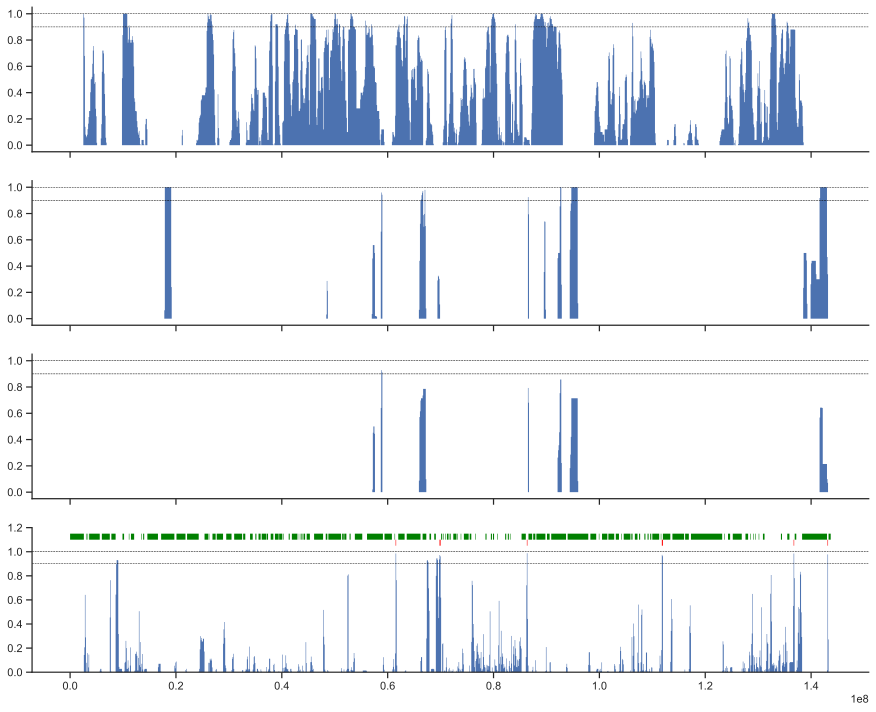

In [97]:
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
plot(chrX_window_means_gog, axes[0])
plot(chrX_window_means_chunga, axes[1])
plot(chrX_window_means_mahale, axes[2])
plot(chrX_window_means_mikumi, axes[3])

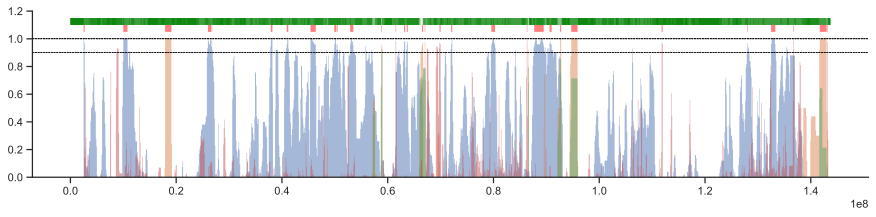

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3), sharex=True)
plot(chrX_window_means_gog, ax, alpha=0.5)
plot(chrX_window_means_chunga, ax, alpha=0.5)
plot(chrX_window_means_mahale, ax, alpha=0.5)
plot(chrX_window_means_mikumi, ax, alpha=0.5)

/home/kmt/miniconda3/envs/baboons/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


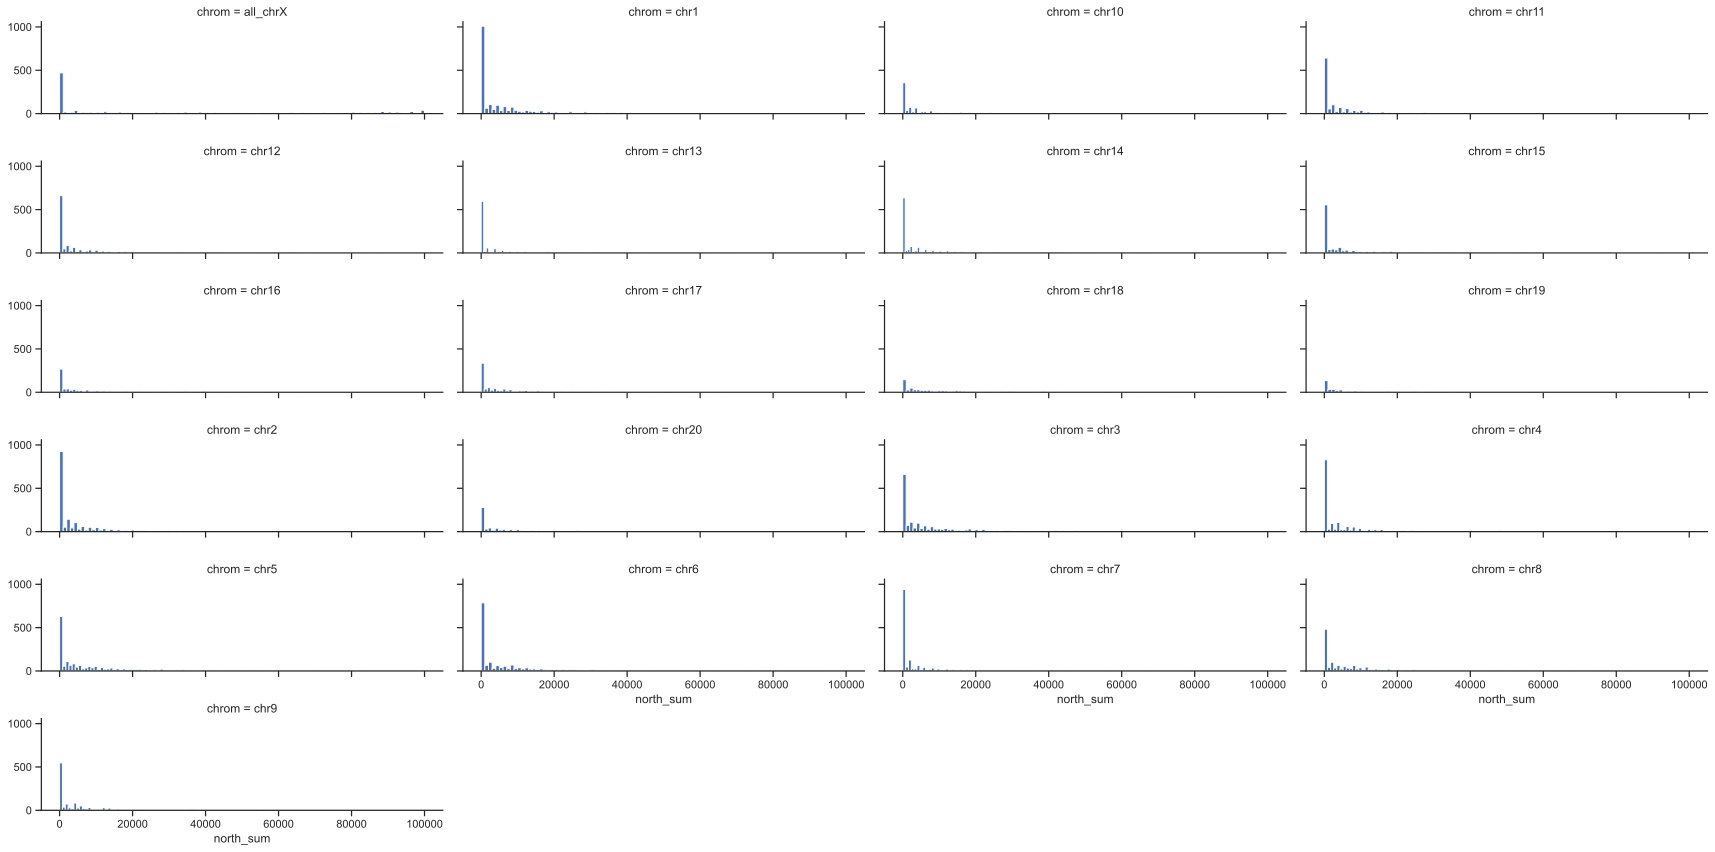

In [16]:
g = sns.FacetGrid(data=window_means_gog, col='chrom', col_wrap=4, height=2, aspect=3)
g.map(plt.hist, 'north_sum', bins=100);

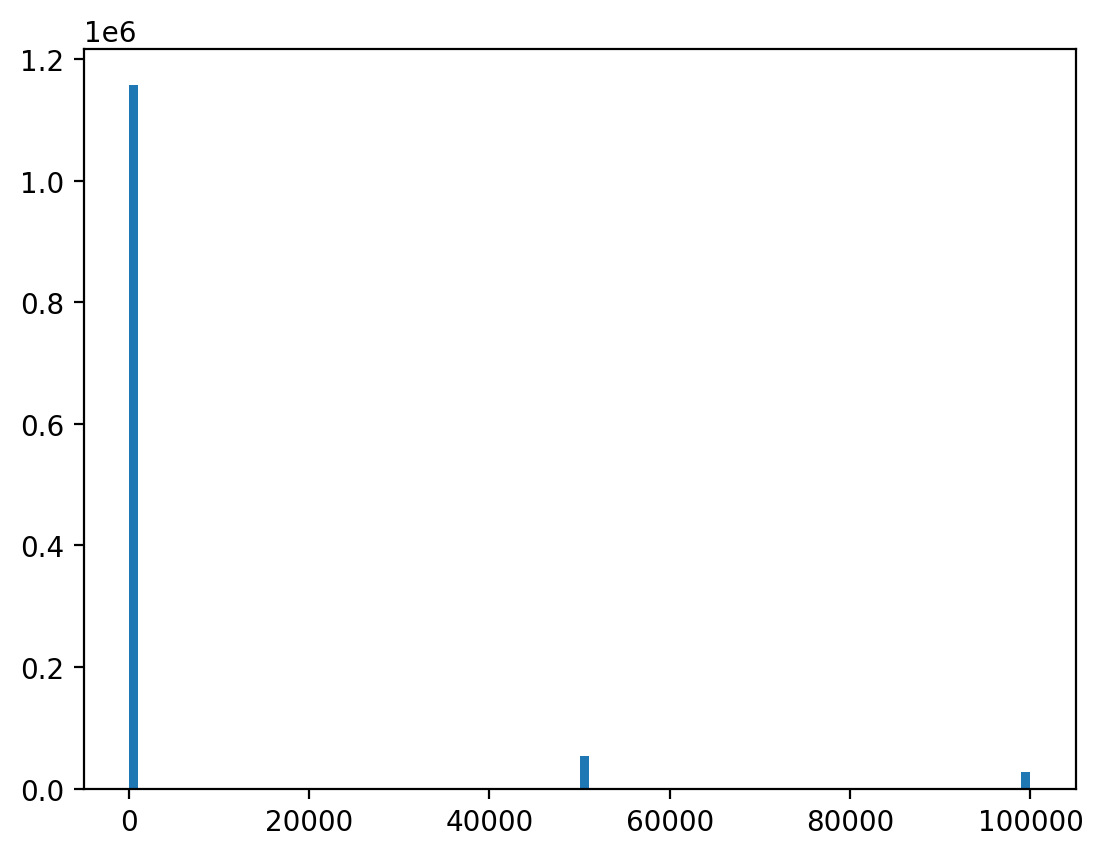

In [6]:
plt.hist(mean_window_df_eth.north_sum, bins=100) ;

In [4]:
mean_window_df_tanz = pd.read_hdf('mean_window_df_tanz.h5')


KeyboardInterrupt

